# galaxy_total_token (= 카테고리 분류 적용 안된 전체 자료)

# ===========================================================
# 출처
# github ID : Jimin980921
# https://github.com/Jimin980921/Text_mining/blob/master/Project/review_preprocessing.ipynb


# 전처리

In [47]:
import pandas as pd
from pandas import DataFrame
from pandas import Series
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("output_galaxy_Total(1).csv")
df['review'][1]
df

,Unnamed: 0,type,category,review,star
0,0,갤럭시S21,전체,"아이폰 7+를 쓰다 배터리가 빨리 닳기 시작한 점, 발열, 충전기 문제 등으로 핸드...",5
1,1,갤럭시S21,전체,자급제 처음 사보는데 그전에는 대리점 가서 맨날 호갱당하구 높은요금제 .서서 나름 ...,5
2,2,갤럭시S21,전체,믿고 쓰는 회사 제품입니다. 티비\n믿고 쓰는 회사 제품입니다.\n티비 광고 보고 ...,5
3,3,갤럭시S21,전체,갤S8에서 유심만 옮겨서 꽂았어요50퍼정도 충전돼서 왔고 액정필름 붙어서 오고 포장...,5
4,4,갤럭시S21,전체,정말 만족한면서 잘 사용하고 있습니다.\n기존 사용하던 LG폰이 너무 버벅 거리고 ...,5
...,...,...,...,...,...
1995,1995,갤럭시S21,전체,배송 빠르고 포장 완벽합니다\n배송 빠르고 포장 완벽합니다,5
1996,1996,갤럭시S21,전체,최고예요\n배송 상품상태 모두 좋아요!!!,5
1997,1997,갤럭시S21,전체,좋아요\n저렴한 가격에 사서 만족합니다! 기존에 쓰던 요금제를 계속 쓸 수 있어서 ...,4
1998,1998,갤럭시S21,전체,저렴하게 잘샀어요 좋습니다\n저렴하게 잘샀어요 좋습니다,4


In [6]:
#review
text=''
review=[]
for each_line in df['review']:
    review.append(each_line)
    
review[1]

'자급제 처음 사보는데 그전에는 대리점 가서 맨날 호갱당하구 높은요금제 .서서 나름 통신사 vvip 이긴한데 해텍도 별로 없고 차리 자급제폰쓰고 알들요금제 쓰는게 이득인것같아 기존폰\n자급제 처음 사보는데 그전에는 대리점 가서 맨날 호갱당하구 높은요금제 .서서 나름 통신사 vvip 이긴한데 해텍도 별로 없고 차리 자급제폰쓰고 알들요금제 쓰는게 이득인것같아 기존폰 할부금 없애버리고 갤력시21구매했어요\n\n배터리 금방 달지 않고 사진도 예쁘게 나오는데 아이폰 살이유는 이제 없어진것같아요 아이폰이 사진 예쁘게 보정되서 고민했는데 삼성이 일을 낸것같아요 저는 너무 만족스러워용 ᄒ ᄒ ᄒ ᄒ\n\n매달마다 비싼요금 내는것보다 알뜰요금제조합으로 데이터무제한 름화무제한해서 한달에25600원 내고 있어요 다들 호갱 당하지 마시고!! 자급제로 갈아타세요!!!!\n전 카드사 할인 까지해서 :엄청싸게 구매했는데 한번 에 돈많이 내 는게 흠이 긴하지만 , 장기적 으로봄때 는 자급제가 훨씬 이득이에요 진짜!! 제가산거 보고 친 구들도 사겠 다고 얼른사세요!'

In [8]:
#불용어 제거
import re
def clean_str(text):
    pattern = '([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)' # E-mail제거
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '(http|ftp|https)://(?:[-\w.]|(?:%[\da-fA-F]{2}))+' # URL제거
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '([ㄱ-ㅎㅏ-ㅣ]+)'  # 한글 자음, 모음 제거
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '<[^>]*>'         # HTML 태그 제거
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '[^\w\s]'         # 특수기호제거
    text = re.sub(pattern=pattern, repl='', string=text)
    return text   

review_=[]
for i in review:
    a=clean_str(i)
    review_.append(a)  #불용어제거한 review 저장
    
review_[1]

'자급제 처음 사보는데 그전에는 대리점 가서 맨날 호갱당하구 높은요금제 서서 나름 통신사 vvip 이긴한데 해텍도 별로 없고 차리 자급제폰쓰고 알들요금제 쓰는게 이득인것같아 기존폰\n자급제 처음 사보는데 그전에는 대리점 가서 맨날 호갱당하구 높은요금제 서서 나름 통신사 vvip 이긴한데 해텍도 별로 없고 차리 자급제폰쓰고 알들요금제 쓰는게 이득인것같아 기존폰 할부금 없애버리고 갤력시21구매했어요\n\n배터리 금방 달지 않고 사진도 예쁘게 나오는데 아이폰 살이유는 이제 없어진것같아요 아이폰이 사진 예쁘게 보정되서 고민했는데 삼성이 일을 낸것같아요 저는 너무 만족스러워용 ᄒ ᄒ ᄒ ᄒ\n\n매달마다 비싼요금 내는것보다 알뜰요금제조합으로 데이터무제한 름화무제한해서 한달에25600원 내고 있어요 다들 호갱 당하지 마시고 자급제로 갈아타세요\n전 카드사 할인 까지해서 엄청싸게 구매했는데 한번 에 돈많이 내 는게 흠이 긴하지만  장기적 으로봄때 는 자급제가 훨씬 이득이에요 진짜 제가산거 보고 친 구들도 사겠 다고 얼른사세요'

In [10]:
import tweepy
# !pip install tweepy==3.10.0
# !pip install konlpy
from konlpy.tag import Okt
t = Okt()

a= len(review_) #불용어 제거한 리뷰
token_review_list=[]
for i in range(0,a): # 리뷰하나당 처리하기위해 for문 
    token_review=t.morphs(review_[i])  #t=형태소분석기. morphs=형태소 추출.review_=전처리한 리뷰.
    #token_review_str=(' '.join(token_review))  #,로 나누어져있는 형태소를 하나의 str로 묶기(df에 넣기위해서)
    #df['token_reivew'] = token_review_str  #이렇게하면 열전체값이 통일됨
    token_review_list.append(token_review) #하나의 리스트를 만들어서 df에 추가해야함.
df['token_review']=token_review_list #형태소단위로 나누어진 리뷰저장


In [11]:
df

,Unnamed: 0,type,category,review,star,token_review
0,0,갤럭시S21,전체,"아이폰 7+를 쓰다 배터리가 빨리 닳기 시작한 점, 발열, 충전기 문제 등으로 핸드...",5,"[아이폰, 7, 를, 쓰다, 배터리, 가, 빨리, 닳기, 시작, 한, 점, 발열, ..."
1,1,갤럭시S21,전체,자급제 처음 사보는데 그전에는 대리점 가서 맨날 호갱당하구 높은요금제 .서서 나름 ...,5,"[자급, 제, 처음, 사보는데, 그, 전, 에는, 대리점, 가서, 맨날, 호갱, 당..."
2,2,갤럭시S21,전체,믿고 쓰는 회사 제품입니다. 티비\n믿고 쓰는 회사 제품입니다.\n티비 광고 보고 ...,5,"[믿고, 쓰는, 회사, 제품, 입니다, 티비, \n, 믿고, 쓰는, 회사, 제품, ..."
3,3,갤럭시S21,전체,갤S8에서 유심만 옮겨서 꽂았어요50퍼정도 충전돼서 왔고 액정필름 붙어서 오고 포장...,5,"[갤, S, 8, 에서, 유심, 만, 옮겨서, 꽂았어요, 50, 퍼정, 도, 충전,..."
4,4,갤럭시S21,전체,정말 만족한면서 잘 사용하고 있습니다.\n기존 사용하던 LG폰이 너무 버벅 거리고 ...,5,"[정말, 만족한면서, 잘, 사용, 하고, 있습니다, \n, 기존, 사용, 하던, L..."
...,...,...,...,...,...,...
1995,1995,갤럭시S21,전체,배송 빠르고 포장 완벽합니다\n배송 빠르고 포장 완벽합니다,5,"[배송, 빠르고, 포장, 완벽합니다, \n, 배송, 빠르고, 포장, 완벽합니다]"
1996,1996,갤럭시S21,전체,최고예요\n배송 상품상태 모두 좋아요!!!,5,"[최고, 예요, \n, 배송, 상품, 상태, 모두, 좋아요]"
1997,1997,갤럭시S21,전체,좋아요\n저렴한 가격에 사서 만족합니다! 기존에 쓰던 요금제를 계속 쓸 수 있어서 ...,4,"[좋아요, \n, 저렴한, 가격, 에, 사서, 만족합니다, 기존, 에, 쓰던, 요,..."
1998,1998,갤럭시S21,전체,저렴하게 잘샀어요 좋습니다\n저렴하게 잘샀어요 좋습니다,4,"[저렴하게, 잘, 샀어요, 좋습니다, \n, 저렴하게, 잘, 샀어요, 좋습니다]"


In [12]:
df.to_csv('galaxy_total_token.csv', encoding='utf-8-sig', mode='w')

# EDA

In [23]:
#별점 기준으로 정렬
df_sorted_by_star= df.sort_values(by='star' ,ascending=False)

len(df_sorted_by_star)

2000

In [24]:
df_sorted_by_star # 별점5점부터 1점까지

,Unnamed: 0,type,category,review,star,token_review
0,0,갤럭시S21,전체,"아이폰 7+를 쓰다 배터리가 빨리 닳기 시작한 점, 발열, 충전기 문제 등으로 핸드...",5,"[아이폰, 7, 를, 쓰다, 배터리, 가, 빨리, 닳기, 시작, 한, 점, 발열, ..."
1281,1281,갤럭시S21,전체,최고예요\n지방이여서 토요일 신청후 화요일배송 받았습니다 배송도 꼼꼼하게 잘해서 보...,5,"[최고, 예요, \n, 지방, 이, 여서, 토요일, 신청, 후, 화요일, 배송, 받..."
1294,1294,갤럭시S21,전체,최고예요\n파손이 되지않을까 했는데 신경써서 포장이 잘되어 왔네요.,5,"[최고, 예요, \n, 파손, 이, 되지, 않을까, 했는데, 신경, 써서, 포장, ..."
1293,1293,갤럭시S21,전체,최고예요\n빠른 배송 좋아요 간단하게 유심만 변경해서 사용했습니나,5,"[최고, 예요, \n, 빠른, 배송, 좋아요, 간단하게, 유심, 만, 변경, 해서,..."
1292,1292,갤럭시S21,전체,최고예요\n몇 달 전에 샀는데 지금까지 잘 쓰고 있습니다 만족스러워요,5,"[최고, 예요, \n, 몇, 달, 전, 에, 샀는데, 지금, 까지, 잘, 쓰고, 있..."
...,...,...,...,...,...,...
1432,1432,갤럭시S21,전체,최악이에요\n사은품을 나중에 배송해서 아쉬웠음. 케이스 사기 전에 임시로 투명케이스...,1,"[최악, 이에요, \n, 사은, 품, 을, 나중, 에, 배송, 해서, 아쉬웠음, 케..."
408,408,갤럭시S21,전체,프로모션 뭔가요...부모님 스마트폰 기본기능만 쓰시는데 삼성멤...\n프로모션 뭔가...,1,"[프로모션, 뭔, 가요, 부모님, 스마트폰, 기, 본, 기능, 만, 쓰시는데, 삼성..."
673,673,갤럭시S21,전체,하자있는 폰인가요?지문인식이 정상작동안하고 속상하네요\n하자있는 폰인가요?지문인식이...,1,"[하자있는, 폰, 인가요, 지, 문, 인식, 이, 정상, 작, 동안, 하고, 속상하..."
407,407,갤럭시S21,전체,최악이에요\n배송이 이렇게 느려도되나싶을정도로느리고 고객센터 전화 정확히 100번 ...,1,"[최악, 이에요, \n, 배송, 이, 이렇게, 느려도, 되나싶을, 정도, 로, 느리..."


In [25]:
adf=df_sorted_by_star.groupby('star').count()

In [26]:
adf 

,Unnamed: 0,type,category,review,token_review
star,,,,,
1,5,5,5,5,5
2,8,8,8,8,8
3,41,41,41,41,41
4,193,193,193,193,193
5,1753,1753,1753,1753,1753


In [31]:
five_review=[]
five_token_review=[]
for i in range(0,1753):
    if(df['star'][i]==5):
        five_review.append(df['review'][i])  #5점리뷰모음. len=3191
        five_token_review.append(df['token_review'][i]) 
        
len(five_token_review)

1544

In [32]:
# 단어 빈도수 계산
frequency = {}

for token_review in five_token_review:
    for word in token_review:
        count = frequency.get(word,0)
        frequency[word] = count + 1
        
sort=sorted(frequency.items(), key=lambda x: x[1], reverse=True)
sort

[('\n', 2007),
 ('도', 1500),
 ('이', 1225),
 ('에', 1145),
 ('배송', 1088),
 ('잘', 881),
 ('폰', 741),
 ('최고', 650),
 ('예요', 618),
 ('구매', 570),
 ('으로', 516),
 ('가', 511),
 ('너무', 497),
 ('은', 487),
 ('사용', 466),
 ('로', 458),
 ('자급', 409),
 ('좋아요', 392),
 ('빠르고', 382),
 ('제', 380),
 ('을', 360),
 ('사은', 307),
 ('요', 292),
 ('했는데', 279),
 ('21', 274),
 ('제품', 262),
 ('핸드폰', 257),
 ('좋네요', 249),
 ('선물', 235),
 ('것', 230),
 ('s', 223),
 ('하고', 214),
 ('는', 214),
 ('해서', 214),
 ('다', 209),
 ('가격', 209),
 ('바로', 209),
 ('감사합니다', 202),
 ('갤럭시', 199),
 ('보다', 197),
 ('주문', 196),
 ('를', 189),
 ('구입', 188),
 ('발열', 187),
 ('만족합니다', 185),
 ('한', 183),
 ('좋습니다', 182),
 ('만', 179),
 ('색상', 178),
 ('케이스', 176),
 ('했어요', 172),
 ('품', 171),
 ('포장', 170),
 ('받았습니다', 170),
 ('이라', 168),
 ('좋은', 167),
 ('상품', 161),
 ('같아요', 156),
 ('에서', 154),
 ('맘', 154),
 ('충전기', 153),
 ('빠른', 151),
 ('할인', 149),
 ('했습니다', 149),
 ('필름', 147),
 ('없이', 146),
 ('아주', 145),
 ('할', 144),
 ('금제', 142),
 ('많이', 139),
 ('카메라', 139)

# ===========================================================

# 상기 과정 까지는 인용한 코드

# ===========================================================

# 자체 EDA 및 분석

### 기본 분석

In [36]:
df = df_sorted_by_star
df #별점 기준 정렬한 데이터 

,Unnamed: 0,type,category,review,star,token_review
0,0,갤럭시S21,전체,"아이폰 7+를 쓰다 배터리가 빨리 닳기 시작한 점, 발열, 충전기 문제 등으로 핸드...",5,"[아이폰, 7, 를, 쓰다, 배터리, 가, 빨리, 닳기, 시작, 한, 점, 발열, ..."
1281,1281,갤럭시S21,전체,최고예요\n지방이여서 토요일 신청후 화요일배송 받았습니다 배송도 꼼꼼하게 잘해서 보...,5,"[최고, 예요, \n, 지방, 이, 여서, 토요일, 신청, 후, 화요일, 배송, 받..."
1294,1294,갤럭시S21,전체,최고예요\n파손이 되지않을까 했는데 신경써서 포장이 잘되어 왔네요.,5,"[최고, 예요, \n, 파손, 이, 되지, 않을까, 했는데, 신경, 써서, 포장, ..."
1293,1293,갤럭시S21,전체,최고예요\n빠른 배송 좋아요 간단하게 유심만 변경해서 사용했습니나,5,"[최고, 예요, \n, 빠른, 배송, 좋아요, 간단하게, 유심, 만, 변경, 해서,..."
1292,1292,갤럭시S21,전체,최고예요\n몇 달 전에 샀는데 지금까지 잘 쓰고 있습니다 만족스러워요,5,"[최고, 예요, \n, 몇, 달, 전, 에, 샀는데, 지금, 까지, 잘, 쓰고, 있..."
...,...,...,...,...,...,...
1432,1432,갤럭시S21,전체,최악이에요\n사은품을 나중에 배송해서 아쉬웠음. 케이스 사기 전에 임시로 투명케이스...,1,"[최악, 이에요, \n, 사은, 품, 을, 나중, 에, 배송, 해서, 아쉬웠음, 케..."
408,408,갤럭시S21,전체,프로모션 뭔가요...부모님 스마트폰 기본기능만 쓰시는데 삼성멤...\n프로모션 뭔가...,1,"[프로모션, 뭔, 가요, 부모님, 스마트폰, 기, 본, 기능, 만, 쓰시는데, 삼성..."
673,673,갤럭시S21,전체,하자있는 폰인가요?지문인식이 정상작동안하고 속상하네요\n하자있는 폰인가요?지문인식이...,1,"[하자있는, 폰, 인가요, 지, 문, 인식, 이, 정상, 작, 동안, 하고, 속상하..."
407,407,갤럭시S21,전체,최악이에요\n배송이 이렇게 느려도되나싶을정도로느리고 고객센터 전화 정확히 100번 ...,1,"[최악, 이에요, \n, 배송, 이, 이렇게, 느려도, 되나싶을, 정도, 로, 느리..."


In [38]:
df.info()    #  데이터프레임 분석1

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 392
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    2000 non-null   int64 
 1   type          2000 non-null   object
 2   category      2000 non-null   object
 3   review        2000 non-null   object
 4   star          2000 non-null   int64 
 5   token_review  2000 non-null   object
dtypes: int64(2), object(4)
memory usage: 109.4+ KB


In [39]:
df.describe()   #  데이터프레임 분석2

,Unnamed: 0,star
count,2000.000000,2000.000000
mean,999.500000,4.840500
std,577.494589,0.478722
min,0.000000,1.000000
25%,499.750000,5.000000
50%,999.500000,5.000000
75%,1499.250000,5.000000
max,1999.000000,5.000000


In [54]:
## 단어 빈도 세기 (최대한 조사 제외하는 방향으로) ##

#####################################################################################
#상기 인용 코드 변형 (dictionary 수업내용으로 변형, 조건문 추가) ####################
#####################################################################################
def count_word(dff):
    
    df_token_review=[]
    for i in range(0,len(dff)):
        df_token_review.append(df['token_review'][i]) 
    
    frequency = {}
        
    for token_review in df_token_review:
        for word in token_review:
            if word not in ['\n','이','도','에','예요','은','는','가','을','를','로','에','요',\
                            '\n\n','으로','에서','에는','그','것','다','의','들','서','만','와','과','이라']:
                frequency[word] = frequency.get(word,0)+ 1
    sort=sorted(frequency.items(), key=lambda x: x[1], reverse=True)
    
    return sort
#####################################################################################
#####################################################################################
#####################################################################################

sort_df = count_word(df)
sort_df

[('배송', 1360),
 ('잘', 1080),
 ('폰', 915),
 ('최고', 740),
 ('구매', 687),
 ('사용', 624),
 ('좋아요', 583),
 ('너무', 565),
 ('자급', 473),
 ('빠르고', 464),
 ('제', 458),
 ('사은', 373),
 ('했는데', 348),
 ('제품', 317),
 ('21', 314),
 ('좋네요', 307),
 ('핸드폰', 295),
 ('하고', 288),
 ('선물', 280),
 ('해서', 274),
 ('발열', 264),
 ('s', 259),
 ('가격', 251),
 ('한', 247),
 ('주문', 246),
 ('보다', 244),
 ('갤럭시', 241),
 ('감사합니다', 233),
 ('바로', 232),
 ('좋습니다', 228),
 ('구입', 224),
 ('만족합니다', 223),
 ('케이스', 217),
 ('품', 216),
 ('상품', 210),
 ('색상', 210),
 ('포장', 205),
 ('받았습니다', 205),
 ('했어요', 195),
 ('같아요', 192),
 ('좋은', 189),
 ('맘', 187),
 ('더', 187),
 ('좀', 186),
 ('할인', 185),
 ('했습니다', 185),
 ('아주', 182),
 ('빠른', 182),
 ('할', 180),
 ('없이', 180),
 ('충전기', 178),
 ('필름', 178),
 ('카메라', 177),
 ('많이', 174),
 ('S', 173),
 ('안', 172),
 ('저렴하게', 164),
 ('금제', 163),
 ('고', 163),
 ('중', 162),
 ('빨리', 156),
 ('유심', 156),
 ('마음', 155),
 ('새', 153),
 ('생각', 152),
 ('수', 152),
 ('날', 150),
 ('입니다', 146),
 ('품도', 145),
 ('다음', 144),
 ('고민', 

### 자체 EDA 및 분석1

In [56]:
## 별점에 따라 데이터프레임 분리 ##
df1 = df[df['star']==1]
df2 = df[df['star']==2]
df3 = df[df['star']==3]
df4 = df[df['star']==4]
df5 = df[df['star']==5]

## 별점 별 단어 빈도수 저장 ##
df1_sort = count_word(df1)
df2_sort = count_word(df2)
df3_sort = count_word(df3)
df4_sort = count_word(df4)
df5_sort = count_word(df5)


In [59]:
## 별점 별 상위 30개 단어 비교 ##

#1. 긍정적인 반응이 많음을 확인 가능(최고, 잘, 빠르고, 만족합니다 등등 = 실제로 5~4점 별점의 비율 높음)
# 단, 배송과 같이 제품 외적인 요소에 대한 긍정적 반응이 많다는 단점 존재.

#2. 자급제에 대한 내용이 많은 것으로 보아 자급제 스마트폰의 수요가 증가했음을 유추 가능.

#3.특히 단점의 측면에서 별점이 낮을수록 발열에 대한 언급 순위가 높아지는 경향을 볼 수 있다.
#('실제 발열이 존재하는지 / 혹은 발열이 있다고 들었는데 없었는지' 와 같은 내용은 확인 필요)

#4.또한 별점이 낮을수록 아이폰에 대한 언급 순위가 증가하는 것으로 보아, 아이폰의 경쟁 제품으로서 인식된다는 것을 유추 가능.


print(f'df5 = {df5_sort[0:30]}')
print(f'\ndf4 = {df4_sort[0:30]}')
print(f'\ndf3 = {df3_sort[0:30]}')
print(f'\ndf2 = {df2_sort[0:30]}')
print(f'\ndf1 = {df1_sort[0:30]}')

df5 = [('배송', 1214), ('잘', 980), ('폰', 881), ('구매', 654), ('최고', 650), ('사용', 585), ('너무', 528), ('좋아요', 497), ('자급', 444), ('제', 428), ('빠르고', 415), ('사은', 360), ('했는데', 327), ('21', 304), ('제품', 296), ('좋네요', 286), ('핸드폰', 283), ('하고', 273), ('해서', 260), ('발열', 251), ('선물', 246), ('s', 242), ('주문', 234), ('한', 233), ('갤럭시', 233), ('보다', 230), ('바로', 219), ('가격', 217), ('케이스', 214), ('감사합니다', 213)]

df4 = [('폰', 324), ('구매', 211), ('사용', 196), ('잘', 156), ('제', 140), ('자급', 135), ('배송', 118), ('21', 117), ('발열', 108), ('너무', 108), ('한', 95), ('하고', 90), ('했는데', 87), ('핸드폰', 86), ('s', 83), ('S', 81), ('해서', 78), ('갤럭시', 76), ('할', 75), ('사은', 75), ('최고', 71), ('케이스', 70), ('충전기', 69), ('필름', 64), ('카메라', 64), ('같아요', 64), ('보다', 64), ('제품', 63), ('좀', 63), ('고민', 62)]

df3 = [('폰', 139), ('구매', 68), ('사용', 64), ('S', 52), ('제', 50), ('발열', 48), ('21', 47), ('자급', 46), ('너무', 40), ('한', 39), ('핸드폰', 37), ('잘', 33), ('하고', 32), ('보상', 30), ('할', 28), ('금제', 28), ('보다', 28), ('기준', 28), 

Text(0, 0.5, 'counts')

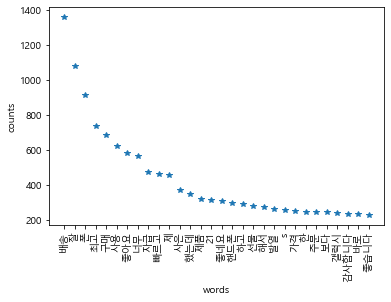

In [85]:
## 전체 데이터 단어별 빈도수 시각화 (상위 30개 단어 기준) ##
plt.rc('font', family='Malgun Gothic') #[출처] 파이썬강좌 - 맷플랍립 matplotlib.pyplot 그래프에서 ㅁㅁㅁ 한글 깨지는거 해결해주는 코드 plt.rc('font', family='Malgun Gothic')|작성자 프롭텡 프롭테크  (https://blog.naver.com/rock6212/222585719056) 

sort_df_dict=dict(sort_df)
x= list(sort_df_dict.keys())[:30]
y= list(sort_df_dict.values())[:30]
plt.plot(x,y,'*')
plt.xticks(rotation=90)  #[출처] https://matplotlib.org/2.0.2/api/pyplot_api.html?highlight=xticks#matplotlib.pyplot.xticks

plt.xlabel('words')
plt.ylabel('counts')

Text(0, 0.5, 'star1_counts')

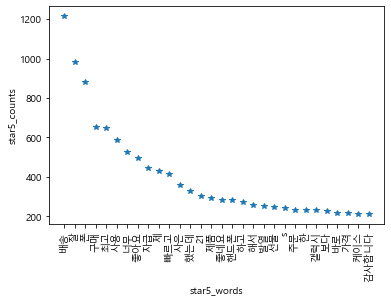

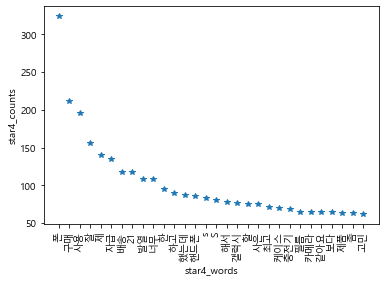

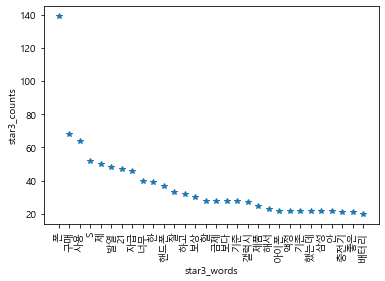

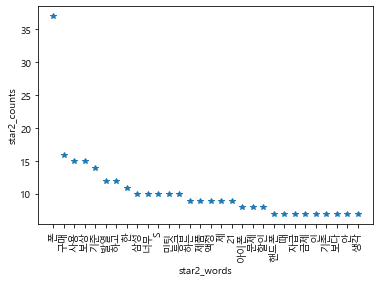

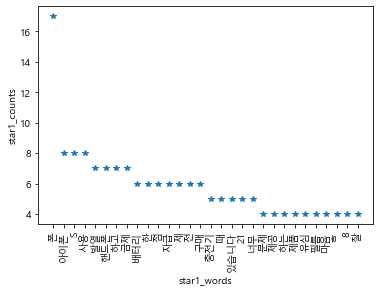

In [90]:
## 별점별 단어 빈도수 시각화 (상위 30개 단어 기준) ##
x=list(dict(df5_sort).keys())[:30]
y=list(dict(df5_sort).values())[:30]
plt.plot(x,y,'*')
plt.xticks(rotation=90)    #[출처] https://matplotlib.org/2.0.2/api/pyplot_api.html?highlight=xticks#matplotlib.pyplot.xticks
plt.xlabel('star5_words')
plt.ylabel('star5_counts')

plt.figure()
x=list(dict(df4_sort).keys())[:30]
y=list(dict(df4_sort).values())[:30]
plt.plot(x,y,'*')
plt.xticks(rotation=90)    #[출처] https://matplotlib.org/2.0.2/api/pyplot_api.html?highlight=xticks#matplotlib.pyplot.xticks
plt.xlabel('star4_words')
plt.ylabel('star4_counts')

plt.figure()
x=list(dict(df3_sort).keys())[:30]
y=list(dict(df3_sort).values())[:30]
plt.plot(x,y,'*')
plt.xticks(rotation=90)    #[출처] https://matplotlib.org/2.0.2/api/pyplot_api.html?highlight=xticks#matplotlib.pyplot.xticks
plt.xlabel('star3_words')
plt.ylabel('star3_counts')

plt.figure()
x=list(dict(df2_sort).keys())[:30]
y=list(dict(df2_sort).values())[:30]
plt.plot(x,y,'*')
plt.xticks(rotation=90)    #[출처] https://matplotlib.org/2.0.2/api/pyplot_api.html?highlight=xticks#matplotlib.pyplot.xticks
plt.xlabel('star2_words')
plt.ylabel('star2_counts')

plt.figure()
x=list(dict(df1_sort).keys())[:30]
y=list(dict(df1_sort).values())[:30]
plt.plot(x,y,'*')
plt.xticks(rotation=90)    #[출처] https://matplotlib.org/2.0.2/api/pyplot_api.html?highlight=xticks#matplotlib.pyplot.xticks
plt.xlabel('star1_words')
plt.ylabel('star1_counts')

Text(0, 0.5, 'star1_density')

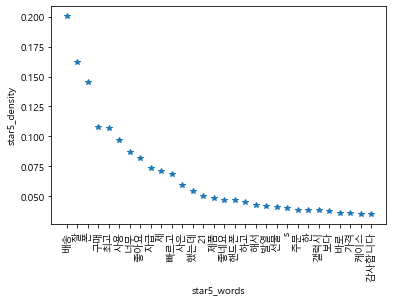

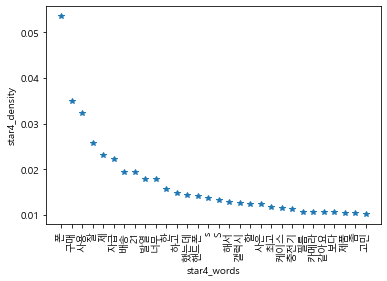

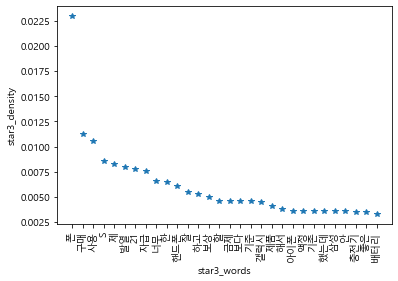

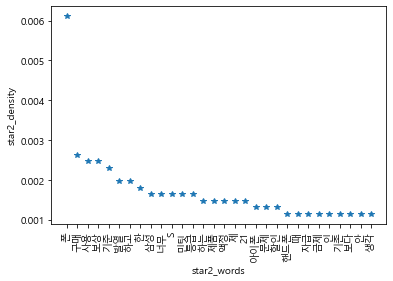

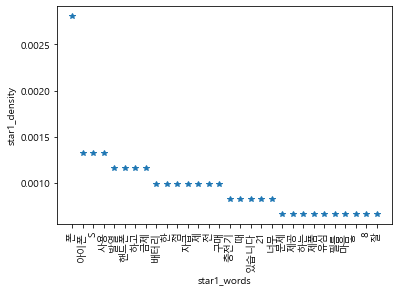

In [111]:
## 별점별 단어 비율 시각화 (상위 30개 단어 기준) ##
x=list(dict(df5_sort).keys())[:30]
y=list(pd.Series(dict(df5_sort))/len(dict(df5_sort)))[:30]
plt.plot(x,y,'*')
plt.xticks(rotation=90)    #[출처] https://matplotlib.org/2.0.2/api/pyplot_api.html?highlight=xticks#matplotlib.pyplot.xticks
plt.xlabel('star5_words')
plt.ylabel('star5_density')

plt.figure()
x=list(dict(df4_sort).keys())[:30]
y=list(pd.Series(dict(df4_sort))/len(dict(df5_sort)))[:30]
plt.plot(x,y,'*')
plt.xticks(rotation=90)    #[출처] https://matplotlib.org/2.0.2/api/pyplot_api.html?highlight=xticks#matplotlib.pyplot.xticks
plt.xlabel('star4_words')
plt.ylabel('star4_density')

plt.figure()
x=list(dict(df3_sort).keys())[:30]
y=list(pd.Series(dict(df3_sort))/len(dict(df5_sort)))[:30]
plt.plot(x,y,'*')
plt.xticks(rotation=90)    #[출처] https://matplotlib.org/2.0.2/api/pyplot_api.html?highlight=xticks#matplotlib.pyplot.xticks
plt.xlabel('star3_words')
plt.ylabel('star3_density')

plt.figure()
x=list(dict(df2_sort).keys())[:30]
y=list(pd.Series(dict(df2_sort))/len(dict(df5_sort)))[:30]
plt.plot(x,y,'*')
plt.xticks(rotation=90)    #[출처] https://matplotlib.org/2.0.2/api/pyplot_api.html?highlight=xticks#matplotlib.pyplot.xticks
plt.xlabel('star2_words')
plt.ylabel('star2_density')

plt.figure()
x=list(dict(df1_sort).keys())[:30]
y=list(pd.Series(dict(df1_sort))/len(dict(df5_sort)))[:30]
plt.plot(x,y,'*')
plt.xticks(rotation=90)    #[출처] https://matplotlib.org/2.0.2/api/pyplot_api.html?highlight=xticks#matplotlib.pyplot.xticks
plt.xlabel('star1_words')
plt.ylabel('star1_density')

### 자체 EDA 및 분석2

Text(0, 0.5, 'review_density')

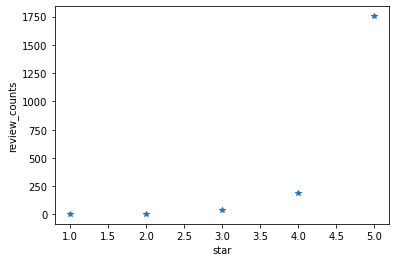

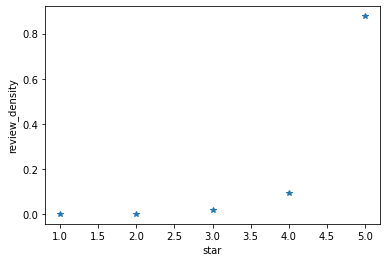

In [70]:
## 별점 별 리뷰 수 ##

# 빈도 #
plt.figure()
plt.plot([5,4,3,2,1],df['star'].value_counts().values,'*')
plt.xlabel("star")
plt.ylabel("review_counts")

# 비율 #
plt.figure()
plt.plot([5,4,3,2,1],df['star'].value_counts().values/len(df),'*')
plt.xlabel("star")
plt.ylabel("review_density")

### 자체 EDA 및 분석3

[ 39.67187819 -87.41272637]


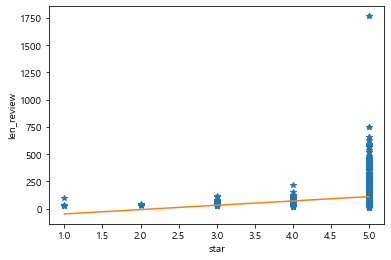

In [88]:
## 별점과 리뷰 길이 (글자수) 의 상관관계 분석 ##

# ggplot2의 jitter나 boxplot 을 배웠다면 좋았을 것으로 생각되지만
# 해당 결과를 보면 대체적으로 별점이 높을수록 리뷰 길이가 길어지는 경향을 보이는 것을 확인할 수 있다. 

nchar=[]
for i in range(len(df)):
    nchar.append(len(df['review'][i]))
    
df['nchar']=nchar    

plt.plot(df['star'],df['nchar'],'*')
plt.xlabel('star')
plt.ylabel('len_review')

coef=np.polyfit(df['star'],df['nchar'],1)
xx=np.linspace(1,5,100)
yy= np.polyval(coef,xx)

plt.plot(xx,yy)
print(coef)